In [33]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 8
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["font.size"] = 24
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["figure.figsize"] = (6, 6)

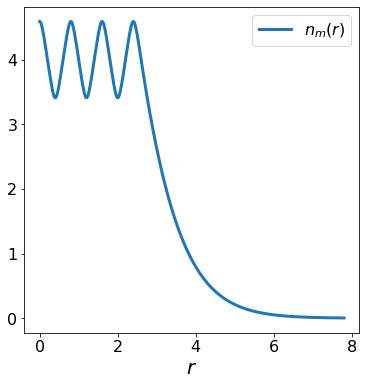

In [41]:
pi = np.pi

a = 0.2


n_min = 3
n_max = 5
amp = n_max - n_min
offset = n_max

slope = 4
period = 2*amp*(1-a)/slope
num_peaks = 4


def decay_tail(grids, b, x, y, y_prime):
  """ decay tail f(x) = A x^b e^(-kx) with f(x) = y and f'(x) = y' """

  k = ((-y_prime*x/y) + b)/x
  A = y/(x**b * np.exp(-k*x))

  return A* grids**b * np.exp(-k*grids)


def monster():

  # grids used in oscillatory region
  osc_len = (num_peaks-3/4)*period
  grids_1 = np.linspace(0, osc_len, 1000)
  osc_density = offset - amp*np.arccos((1 - a)*np.sin((1/period)*2*pi*(grids_1+(period/4))))/pi
  

  # grids used in decay region
  # (use 2x the length of osc. region)
  grids_2 = np.linspace(osc_len, 3*osc_len, 2000)

  def decay_tail(grids, b, x, y, y_prime):
    """ decay tail f(x) = A x^b e^(-kx) with f(x) = y and f'(x) = y' """

    k = ((-y_prime*x/y) + b)/x
    A = y/(x**b * np.exp(-k*x))

    return A* grids**b * np.exp(-k*grids)

  tail = decay_tail(grids_2, b=2, x=grids_1[-1], y=osc_density[-1], y_prime=-slope)

  n_m = np.concatenate((osc_density, tail[1:]), axis=0)
  grids = np.concatenate((grids_1, grids_2[1:]), axis=0)

  return grids, n_m

grids, n_m = monster()

plt.plot(grids, n_m, label='$n_m(r)$')

plt.xlabel('$r$')
plt.legend()

plt.savefig('monster_density_example.pdf', bbox_inches='tight')
